### 1. Download and plot 3 apparently related sets of data with at least. Each set should contain at least two related variables. You should explain *how* variables in each set of data are related. Plot each set using the scatter plot function *and* the line graph function. For example, you might the obseved rate of unemployement and the natural rate of unemployment in the same graph. To find data, search for data at FRED and use the code associated with the data. For example, the [CPI measure that includes urban items](https://fred.stlouisfed.org/series/CPIAUCSL) is identified by the code, *CPIAUCSL*.

In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def gather_data(data_codes,
               start,end = datetime.datetime.today(),
               freq = "M"):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            #.first() or .last() or .median()...
            df = web.DataReader(code, "fred", start, end).resample(freq).mean() 
            df.rename(columns = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
    return df

In [27]:
data_codes  = {"Unemployment Rate": "UNRATE",
               "Unemployment Rate - Black or African American": "LNS14000006",
               "Unemployment Rate - Women": "LNS14000002",
               "CPI - Total All Items for the United States": "CPIAUCSL",
               "Federal Funds Effective Rate": "FEDFUNDS"}

start = datetime.datetime(1975, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, 
                   start = start, 
                   end = end, 
                   freq = "M")
data

,Unemployment Rate,Unemployment Rate - Black or African American,Unemployment Rate - Women,CPI - Total All Items for the United States,Federal Funds Effective Rate
DATE,,,,,
1975-01-31,8.1,14.1,9.2,52.300,7.13
1975-02-28,8.1,14.4,9.1,52.600,6.24
1975-03-31,8.6,15.1,9.6,52.800,5.54
1975-04-30,8.8,15.3,9.6,53.000,5.49
1975-05-31,9.0,15.1,9.8,53.100,5.22
...,...,...,...,...,...
2022-09-30,3.5,5.9,3.4,296.539,2.56
2022-10-31,3.7,5.9,3.7,297.987,3.08
2022-11-30,3.6,5.7,3.6,298.598,3.78


In [28]:
data_plot1 = data[["Unemployment Rate",
                   "Unemployment Rate - Black or African American"]]
data_plot1

,Unemployment Rate,Unemployment Rate - Black or African American
DATE,,
1975-01-31,8.1,14.1
1975-02-28,8.1,14.4
1975-03-31,8.6,15.1
1975-04-30,8.8,15.3
1975-05-31,9.0,15.1
...,...,...
2022-09-30,3.5,5.9
2022-10-31,3.7,5.9
2022-11-30,3.6,5.7


TypeError: scatter() missing 1 required positional argument: 'y'

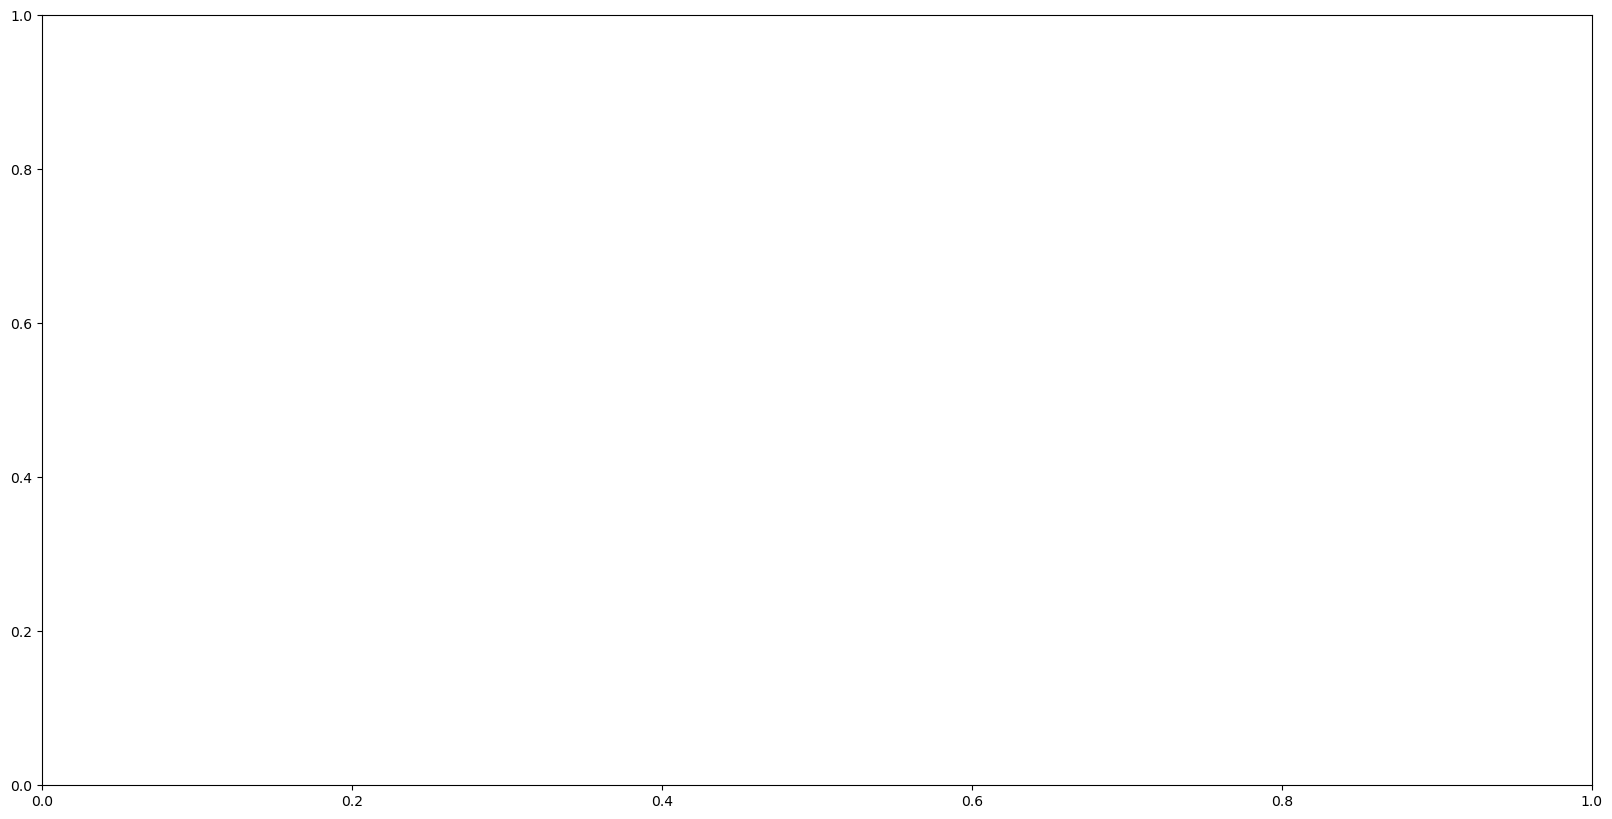

In [40]:
fig, ax = plt.subplots(figsize = (20,10))
plt.scatter(data_plot1)

<AxesSubplot:xlabel='DATE'>

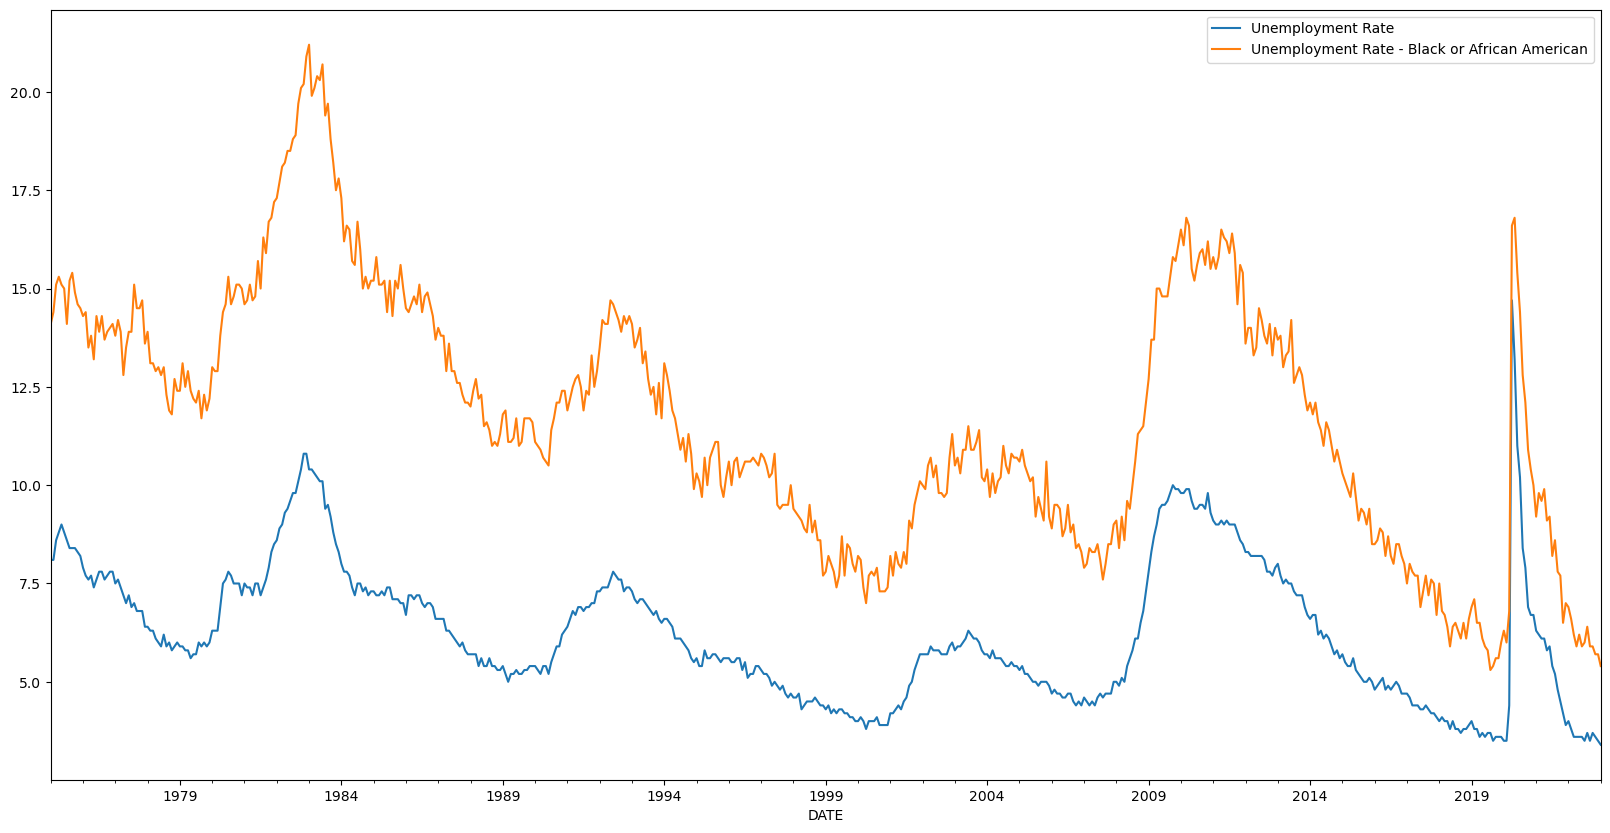

In [32]:
fig, ax = plt.subplots(figsize = (20,10))
data_plot1.plot.line(ax = ax)